In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [2]:
domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']
metric = "AUPRC"

# dir_path = "../results/DGAD/method5/1"
dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/DGAD/method5/3'
dir_path = "../results/DGAD/method6_tau"
# dir_path = '../results/DGAD/method5/3'
# dir_path = '../results/DGAD/method5_reg_lambda'
# dir_path = '../results/DGAD/method8'
dir_path = '../results/DGAD/method6_lambda'
# dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method7'
# dir_path = '../results/DGAD/method7_tau_lambda'

dir_path = '../results/DGAD/method6_revision'
dir_path = '../results/DGAD/method5/3'
dir_path = '../results/DGAD/method5_aug/3'
dir_path = '../results/DGAD/method5_reg_lambda'
dir_path = '../results/DGAD/method10'
dir_path = '../results/DGAD/method9_beta_list'
dir_path = '../results/DGAD/method10_prototype_norm'
dir_path = '../results/DGAD/method9'
dir_path = '../results/DGAD/method9_revision'
dir_path = '../results/DGAD/method9_kmeans'
dir_path = '../results/devnet/one_source_domain'
dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method6_lambda'
dir_path = '../results/DGAD/method6_revision'
# dir_path = '../results/DGAD/VAE_DEVNET'
# dir_path = '../results/DGAD/method6_2devnet'
# dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/devnet/3domain'
dir_path = '../results/DGAD/method12'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/method14'
# dir_path = '../old_results/DGAD/method6_lambda'
# dir_path = '../results/DGAD/method13_lambda'
dir_path = '../results/DGAD/VAE_LPIPS'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'
# dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/V_L_D'
dir_path = '../results/DGAD/20240908V_L_D'

dir_path = '../results/devnet/3domain'
# dir_path = '../old_results/devnet/many_versus_many'
# dir_path = '../results/devnet/20240915'
dir_path = '../results/DGAD/latent_dim_DGAD'

dir_path = '../results/DGAD/latent_dim_devnet'

# dir_path = '../results/DGAD/latent_dim_DGAD_lambda'


dir_path = '../results/devnet/20240915'

# dir_path = '../results/DGAD/method13_lambda'

dir_path = '../results/DGAD/latent_dim_CVAE_Unet'
dir_path = '../results/DGAD/latent_dim_CVAE_Unet'

dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'

# dir_path = '../results/DGAD/20240908V_L_D'
dir_path = '../results/DGAD/CVAE_DEVNET_rec_N'
dir_path = '../results/DGAD/method16'

# dir_path = '../results/devnet/20240915'
# dir_path = '../results/DGAD/method16_lambda'
dir_path = '../results/DGAD/method16_contamination'
# dir_path = '../results/devnet/PACS_contamination'

In [3]:
import itertools
# normal_class=["0", "1", "2", "3", "4", "5", "6"]
# normal_class=["0 1 2 3", "4 5 6", "0 2 4 6", "1 3 5", "0", "1", "2", "3", "4", "5", "6"]
# anomaly_class=["4 5 6", "0 1 2 3", "1 3 5", "0 2 4 6", "1 2 3 4 5 6", "0 2 3 4 5 6", "0 1 3 4 5 6", "0 1 2 4 5 6", "0 1 2 3 5 6", "0 1 2 3 4 6", "0 1 2 3 4 5"]
# epochs_list=[5, 10, 15, 20, 30]
# lr_list=[0.01, 0.001, 0.0005, 0.0002, 0.00005, 0.00001]
reg_lambda=[1,2,5,10]
NCE_lambda=[1,2,5,10]
PL_lambda=[1,2,5,10]
# cnt=[0,1,2,3,4]
cnt=[0]
all_para_list = list(itertools.product(reg_lambda, NCE_lambda, PL_lambda, cnt))
print(len(all_para_list))
all_para_list[0]

64


(1, 1, 1, 0)

In [4]:
ans = []
# para_name_list=["normal_class", "anomaly_class", "pre_lr", "pre_epochs", "lr", "epochs", "cnt"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2"]
para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "reg_lambda", "BalancedBatchSampler"]
if dir_path.__contains__("method16_lambda"):
    para_name_list=["normal_class", "anomaly_class", "cnt", "reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]
if dir_path.__contains__("contamination"):
    para_name_list=["contamination_rate", "normal_class", "anomaly_class", "lr", "epochs", "cnt",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "rec_lambda",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt","reg_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2", "reg_lambda", "NCE_lambda", "PL_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "origin_svdd_lambda", "class_svdd_lambda", "align_lambda", "beta"]
print(len(os.listdir(dir_path)))
for file_name in os.listdir(dir_path):
    record = []
    data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
    max_epoch = data["val_max_metric"].item()["epoch"]
    # max_epoch = [i for i, val in enumerate(data[f"val_{metric}_list"]) if (val == max(data[f"val_{metric}_list"]))][-1]
    
    for key in para_name_list:
        if key in data["args"].item():
            record.append(data["args"].item()[key])
        else:
            record.append(None)
    
    record.append(max_epoch)

    if "metric" in data["val_max_metric"].item():
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUROC"])
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUPRC"])
    else:
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUROC"])
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUPRC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUROC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUPRC"])

    record.append(file_name)
    ans.append(record)

ans = pd.DataFrame(ans,columns=para_name_list + ["max_val_epoch"] +\
             [f'{item}_AUROC' for item in domain_list] + \
                [f'{item}_AUPRC' for item in domain_list] +\
                    [f'val_{item}_AUROC' for item in domain_list] +\
                        [f'val_{item}_AUPRC' for item in domain_list] + ["file_name"])

ans["normal_class"] = ans["normal_class"].astype(str)
ans["anomaly_class"] = ans["anomaly_class"].astype(str)
ans["AUROC_mean"] = ans[["art_painting_AUROC","cartoon_AUROC","photo_AUROC","sketch_AUROC"]].mean(axis = 1)
ans["AUPRC_mean"] = ans[["art_painting_AUPRC","cartoon_AUPRC","photo_AUPRC","sketch_AUPRC"]].mean(axis = 1)
ans["val_AUROC_mean"] = ans[["val_art_painting_AUROC","val_cartoon_AUROC","val_photo_AUROC","val_sketch_AUROC"]].mean(axis = 1)
ans["val_AUPRC_mean"] = ans[["val_art_painting_AUPRC","val_cartoon_AUPRC","val_photo_AUPRC","val_sketch_AUPRC"]].mean(axis = 1)
ans["normal_class"] = ans["normal_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans["anomaly_class"] = ans["anomaly_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans.head(5)

172


,contamination_rate,normal_class,anomaly_class,lr,epochs,cnt,max_val_epoch,photo_AUROC,art_painting_AUROC,cartoon_AUROC,...,val_sketch_AUROC,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,AUROC_mean,AUPRC_mean,val_AUROC_mean,val_AUPRC_mean
0,0.04,0,1 2 3 4 5 6,0.00010,40,1,0,0,0,0,...,0.916667,0.873413,0.425773,0.610690,0.449946,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.895997,0.589956
1,0.12,0,1 2 3 4 5 6,0.00001,30,1,4,0,0,0,...,0.899351,0.835714,0.409415,0.555250,0.372584,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.887958,0.543241
2,0.10,0,1 2 3 4 5 6,0.00050,40,0,14,0,0,0,...,0.356061,0.475197,0.263896,0.153641,0.042150,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.614104,0.233721
3,0.12,0,1 2 3 4 5 6,0.00001,20,0,5,0,0,0,...,0.875541,0.788492,0.342011,0.523108,0.561560,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.882120,0.553793
4,0.06,0,1 2 3 4 5 6,0.00050,30,1,3,0,0,0,...,0.673160,0.818452,0.161791,0.123020,0.089510,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.749658,0.298193


In [5]:
# ans = ans[ans["epochs"] != 2]
# if dir_path.__contains__("devnet"):
#     ans = ans[ans["lr"] != 0.00005]
# ans = ans[ans["cnt"] == 10]
# ans = ans[ans["BalancedBatchSampler"]==0]

In [6]:
ans["normal_class"].value_counts()

0    172
Name: normal_class, dtype: int64

In [7]:
ans.cnt.value_counts()

0    76
1    72
2    24
Name: cnt, dtype: int64

In [8]:
# pre_epochs_list = [10, 30, 50, 100]
# pre_lr_list = [0.01, 0.001, 0.0001]
# epochs_list = [10, 20, 30]
# lr_list = [0.00001, 0.0001, 0.001]
# cnt = [0, 1]
# all_para_list = list(itertools.product(cnt, pre_epochs_list, pre_lr_list, epochs_list, lr_list))
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["cnt", "pre_epochs", "pre_lr", "epochs", "lr"]].values])
# remain_para = pd.DataFrame(sorted(remain_para), columns=["cnt", "pre_epochs", "pre_lr", "epochs", "lr"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [9]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[(ans["epochs"]==30) & (ans["lr"]==0.00005) & (ans["cnt"] == 0)][["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# # remain_para
# len(remain_para)

In [10]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["normal_class", "epochs", "lr", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["normal_class", "epochs", "lr", "cnt"])
# remain_para.insert(1,"anomaly_class", remain_para.apply(lambda x: re.sub("\{|,|\}","", str(set([0,1,2,3,4,5,6]) - set(map(int, x["normal_class"].split(" "))))), axis=1))
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [11]:
if metric == "AUPRC":
    columns_to_drop = ans.filter(like='AUROC').columns.to_list()
    columns_to_drop.remove("val_AUROC_mean")
else:
    columns_to_drop = ans.filter(like='AUPRC').columns.to_list()
    columns_to_drop.remove("val_AUPRC_mean")
columns_to_drop = columns_to_drop + [f"photo_{metric}",f"art_painting_{metric}",f"cartoon_{metric}",f"sketch_{metric}",f"{metric}_mean"]
ans = ans.drop(columns=columns_to_drop) 
columns_to_drop

['photo_AUROC',
 'art_painting_AUROC',
 'cartoon_AUROC',
 'sketch_AUROC',
 'val_photo_AUROC',
 'val_art_painting_AUROC',
 'val_cartoon_AUROC',
 'val_sketch_AUROC',
 'AUROC_mean',
 'photo_AUPRC',
 'art_painting_AUPRC',
 'cartoon_AUPRC',
 'sketch_AUPRC',
 'AUPRC_mean']

In [12]:
# agg_method = {"cnt":["count"],
#               "max_val_epoch":["mean", "std"],
#               f"val_photo_{metric}":["mean", "std"],
#               f"val_art_painting_{metric}":["mean", "std"],
#               f"val_cartoon_{metric}":["mean", "std"],
#               f"val_sketch_{metric}":["mean", "std"],
#               f"val_{metric}_mean":["mean", "std"],
#               f"val_AUROC_mean":["mean", "std"],
#               f"val_AUPRC_mean":["mean", "std"],
#               }

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for normal_class in ["0", "1", "2", "3", "4", "5", "6"]:
#     selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [13]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],
              f"val_photo_{metric}":["mean", "std"],
              f"val_art_painting_{metric}":["mean", "std"],
              f"val_cartoon_{metric}":["mean", "std"],
              f"val_sketch_{metric}":["mean", "std"],
              f"val_{metric}_mean":["mean", "std"],
              f"val_AUROC_mean":["mean", "std"],
              f"val_AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

for contamination_rate in [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]:
    selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
    # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
    group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
    group_key.sort()
    # print(group_key)
    selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
    selected_para = selected_records_anslysis.index[0]
    # print(selected_para)
    selected_records_anslysis

    filter = None
    for idx, item in enumerate(group_key):
        if filter is None:
            filter = selected_records[item] == selected_para[idx]
        else:
            filter = filter & (selected_records[item] == selected_para[idx])
    temp = selected_records[filter].agg(["mean", "std"]).T
    temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
    for key in [f'val_{item}_{metric}' for item in domain_list]:
        print(temp.loc[key]["res"])
    print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
    selected_records[filter]

95.34(0.7)
44.95(6.55)
83.07(4.03)
47.37(0.63)
67.68(2.66)
95.78(7.31)
39.88(4.79)
72.18(3.52)
42.51(12.01)
62.59(2.93)
90.97(5.16)
49.56(2.97)
70.1(2.57)
55.22(4.54)
66.46(2.35)
95.75(6.0)
46.81(6.14)
82.21(5.8)
44.72(7.06)
67.37(0.18)
97.42(3.65)
36.27(1.73)
79.13(7.67)
38.08(7.51)
62.73(4.27)
88.49(8.98)
48.24(4.17)
74.49(3.01)
32.8(10.33)
61.01(1.46)


/tmp/ipykernel_75400/4265299006.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_75400/4265299006.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_75400/4265299006.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_75400/4265299006.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these 

In [14]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(list(item))
# remain_para = pd.DataFrame(remain_para)
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)

In [15]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],2])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],3])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],4])
    
# remain_para = pd.DataFrame(remain_para,columns=["normal_class", "anomaly_class", "epochs", "lr", "cnt"])
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [59]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],
              f"val_photo_{metric}":["mean", "std"],
              f"val_art_painting_{metric}":["mean", "std"],
              f"val_cartoon_{metric}":["mean", "std"],
              f"val_sketch_{metric}":["mean", "std"],
              f"val_{metric}_mean":["mean", "std"],
              f"val_AUROC_mean":["mean", "std"],
              f"val_AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
if dir_path.__contains__("contamination"):
    contamination_rate = 0.08
    selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
else:
    normal_class = '0'
    selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
# group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
group_key.sort()
print(group_key)
selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
selected_para = selected_records_anslysis.index[0]
print(selected_para)
selected_records_anslysis

['contamination_rate', 'epochs', 'lr']
(0.08, 30, 0.0001)


cnt max_val_epoch             \
                                  count          mean        std   
contamination_rate epochs lr                                       
0.08               30     0.00010     2           0.0   0.000000   
                   20     0.00010     2           0.0   0.000000   
                   40     0.00010     2           0.0   0.000000   
                   30     0.00005     2           1.0   0.000000   
                   20     0.00005     2           1.0   0.000000   
                   40     0.00005     2           0.5   0.707107   
                          0.00001     2           5.0   0.000000   
                   20     0.00001     2           5.0   0.000000   
                   30     0.00001     2           5.5   0.707107   
                   40     0.00050     2           9.0  11.313708   
                   30     0.00050     2           5.0   5.656854   
                   20     0.00050     2           5.5   0.707107   

                                  val_photo_AUPRC            \
                                             mean       std   
contamination_rate epochs lr                                  
0.08               30     0.00010        0.957540  0.060048   
                   20     0.00010        0.910913  0.125988   
                   40     0.00010        0.901984  0.065660   
                   30     0.00005        0.875397  0.056120   
                   20     0.00005        0.845139  0.054015   
                   40     0.00005        0.857540  0.081373   
                          0.00001        0.683896  0.009494   
                   20     0.00001        0.740542  0.004957   
                   30     0.00001        0.793173  0.019476   
                   40     0.00050        0.524216  0.080265   
                   30     0.00050        0.497402  0.039198   
                   20     0.00050        0.422973  0.152706   

                                  val_art_painting_AUPRC            \
                                                    mean       std   
contamination_rate epochs lr                                         
0.08               30     0.00010               0.468052  0.061392   
                   20     0.00010               0.457652  0.001005   
                   40     0.00010               0.438372  0.034849   
                   30     0.00005               0.426444  0.095904   
                   20     0.00005               0.425850  0.031049   
                   40     0.00005               0.424519  0.092986   
                          0.00001               0.456474  0.064036   
                   20     0.00001               0.404523  0.026802   
                   30     0.00001               0.453478  0.005413   
                   40     0.00050               0.143910  0.020004   
                   30     0.00050               0.149444  0.065501   
                   20     0.00050               0.412291  0.123741   

                                  val_cartoon_AUPRC            \
                                               mean       std   
contamination_rate epochs lr                                    
0.08               30     0.00010          0.822089  0.058043   
                   20     0.00010          0.695973  0.031531   
                   40     0.00010          0.709318  0.015423   
                   30     0.00005          0.681721  0.097316   
                   20     0.00005          0.627873  0.052513   
                   40     0.00005          0.670676  0.000524   
                          0.00001          0.645162  0.016814   
                   20     0.00001          0.541723  0.042843   
                   30     0.00001          0.544698  0.025831   
                   40     0.00050          0.309850  0.039993   
                   30     0.00050          0.294213  0.327364   
                   20     0.00050          0.073795  0.022917   

                                  val_sket

In [37]:
# tmp = pd.DataFrame([["0","1","1","1"],
# ["1","1","1","0"],
# ["1","1","0","1"],
# ["0","1","1","0"],
# ["0","1","0","1"],
# ["1","1","0","0"],
# ["1","0","0","1"],
# ["1","0","0","0"],
# ["0","0","0","1"],
# ["0","0","0","0"],], columns = ["NCE_lambda","PL_lambda","class_lambda","reg_lambda"], dtype=float)

# for item in list(map(tuple,tmp.to_numpy())):
#     record = selected_records_anslysis.loc[item]
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(f'{round(record.loc[key]["mean"] * 100, 2)}({round(record.loc[key]["std"] * 100, 2)})', end='\t')
#     print(f'{round(record[f"val_{metric}_mean"]["mean"] * 100, 2)}({round(record[f"val_{metric}_mean"]["std"] * 100, 2)})', end='\t')
#     print()

In [38]:
filter = None
for idx, item in enumerate(group_key):
    if filter is None:
        filter = selected_records[item] == selected_para[idx]
    else:
        filter = filter & (selected_records[item] == selected_para[idx])
temp = selected_records[filter].agg(["mean", "std"]).T
temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
for key in [f'val_{item}_{metric}' for item in domain_list]:
    print(temp.loc[key]["res"])
print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
selected_records[filter]

90.97(5.16)
49.56(2.97)
70.1(2.57)
55.22(4.54)
66.46(2.35)


/tmp/ipykernel_75400/1079342940.py:7: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T


,contamination_rate,lr,epochs,cnt,max_val_epoch,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,val_AUROC_mean,val_AUPRC_mean
25,0.06,0.00005,40,1,1,0.855556,0.529218,0.683664,0.566365,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.901819,0.658701
40,0.06,0.00005,40,0,1,0.958333,0.484380,0.730556,0.588919,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.930222,0.690547
91,0.06,0.00005,40,2,1,0.915079,0.473108,0.688889,0.501431,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.894021,0.644627


In [39]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

NpzFile '../results/DGAD/method16_contamination/method=16,backbone=DGAD15,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=40,lr=5e-05,contamination=0.06,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,class_lambda=1.0,cnt=1.npz' with keys: val_max_metric, train_results_loss, sub_train_results_loss, val_results_loss, val_AUROC_list...

In [40]:

# # data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
# file_name = 'results/DGAD/VAE_LPIPS/method=VAE_LPIPS,backbone=VAE,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=250,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=2.npz'
# data = np.load(f'../{file_name}', allow_pickle=True)
# data
# max_val_epoch = data["val_max_metric"].item()["epoch"]
# plt.plot(data["train_results_loss"].mean(axis=1)[0:], label = "train")
# plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.plot(data["val_results_loss"].mean(axis=1), label = "val")
# plt.legend()
# data["train_results_loss"].mean(axis=1)[-10:], data["val_results_loss"].mean(axis=1)[-10:]

In [41]:
# tmp_list = []
# for file_name in selected_records[filter].file_name:
#     data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
#     domain_test_trends = dict()
#     for domain in domain_list:
#         domain_test_trends[domain]={
#             "test_loss_list":[],
#             "AUROC":[],
#             "AUPRC":[],
#         }

#     for res in data["test_results_list"]:
#         if res is not None:
#             for key in res:
#                 domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
#                 domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
#                 domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])
#     tmp = []
#     for domain in domain_list:
#         tmp.append(domain_test_trends[domain][metric][-1]) 
#     tmp.append(np.mean(tmp))
#     tmp_list.append(tmp)

# pd.DataFrame(tmp_list, columns = domain_list + [metric]).agg(["mean", "std"])

In [42]:
domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

### 训练过程中 模型在test上下降趋势

In [43]:
data["args"].item()["epochs"], data["args"].item()["test_epoch"]

(40, 5)

In [44]:
data["test_results_list"].shape

(40,)

1
photo [0.8964646464646464, 0.549404761904762, 0.6561868686868686, 0.5292027417027417, 0.514021164021164, 0.5537037037037037, 0.5026806526806527, 0.5425925925925926, 0.5335016835016835]
art_painting [0.5321716453295401, 0.33810255724850746, 0.38665450676394586, 0.34174228201919066, 0.3767322178138117, 0.2791008111130062, 0.26348915834159486, 0.2651019547603988, 0.25959554143294744]
cartoon [0.47911810411810407, 0.711111111111111, 0.5601045296167246, 0.582749766573296, 0.6336891078270388, 0.67999592999593, 0.6879432624113475, 0.6840277777777777, 0.7058248299319727]
sketch [0.5385888084108149, 0.4945643939393939, 0.5405599647266314, 0.5515455082742317, 0.5601464930733222, 0.5591575091575091, 0.5597637504614248, 0.5604151984965938, 0.5605994152046784]


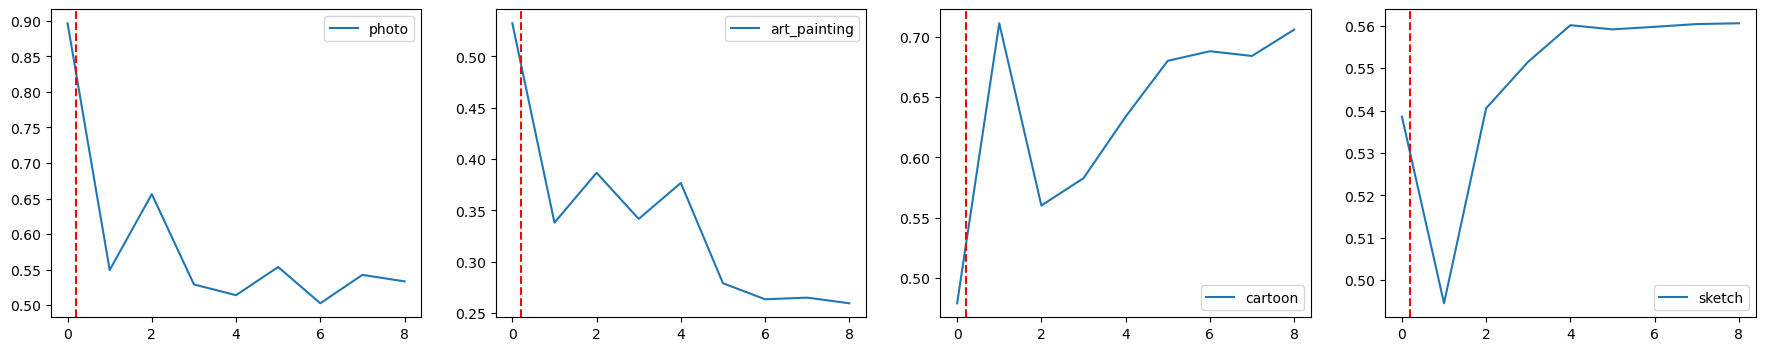

1
photo 0.8555555555555555
art_painting 0.5292176870748299
cartoon 0.6836640211640211
sketch 0.5663654084706717


In [45]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

fig, ax = plt.subplots(1,4, figsize=(22, 4))

for idx, domain in enumerate(domain_list):
    ax[idx].plot(domain_test_trends[domain][metric], label = domain)
    print(domain, domain_test_trends[domain][metric])

    if "metric" in data["val_max_metric"].item():
        if "test_epoch" in data["args"].item():
            ax[idx].axvline(x=max_val_epoch / data["args"].item()["test_epoch"], color='r', linestyle='--')
        else:
            ax[idx].axvline(x=max_val_epoch / 5, color='r', linestyle='--')
    else:
        ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')

    ax[idx].legend()
plt.show()

print(max_val_epoch)
if "metric" in data["val_max_metric"].item():
    for domain in domain_list:
        print(domain, data["val_max_metric"].item()["metric"][domain][metric])
else:
    for domain in domain_list:
        print(domain, domain_test_trends[domain][metric][max_val_epoch])

In [55]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

tmp = []
for idx, domain in enumerate(domain_list):
    tmp.append(domain_test_trends[domain][metric])
tmp = pd.DataFrame(tmp, index=domain_list)
idx = tmp.mean(axis = 0).idxmax()
print(idx)
pd.concat([tmp, pd.DataFrame(tmp.mean(axis = 0), columns = ["avg"]).T])

0


,0,1,2,3,4,5,6,7,8
photo,0.896465,0.549405,0.656187,0.529203,0.514021,0.553704,0.502681,0.542593,0.533502
art_painting,0.532172,0.338103,0.386655,0.341742,0.376732,0.279101,0.263489,0.265102,0.259596
cartoon,0.479118,0.711111,0.560105,0.582750,0.633689,0.679996,0.687943,0.684028,0.705825
sketch,0.538589,0.494564,0.540560,0.551546,0.560146,0.559158,0.559764,0.560415,0.560599
avg,0.611586,0.523296,0.535876,0.501310,0.521147,0.517989,0.503469,0.513034,0.514880


### 训练集loss下降趋势

(1,
 array([ 4.49361724,  2.7320657 ,  1.33791969,  1.07743545,  0.81816111,
         0.58124918,  0.39723496,  0.09592353, -0.13179695, -0.19594597,
        -0.21261798, -0.27970326, -0.29243749, -0.29290625, -0.32215511,
        -0.31459201, -0.30277326, -0.32608777, -0.33092397, -0.32947692,
        -0.35071737, -0.32655773, -0.3524598 , -0.33106032, -0.32339913,
        -0.32180629, -0.34506397, -0.32005656, -0.33128182, -0.35978241,
        -0.37946222, -0.33542406, -0.36103045, -0.36108707, -0.34819044,
        -0.36491322, -0.3515028 , -0.36135359, -0.37386262, -0.36935985]))

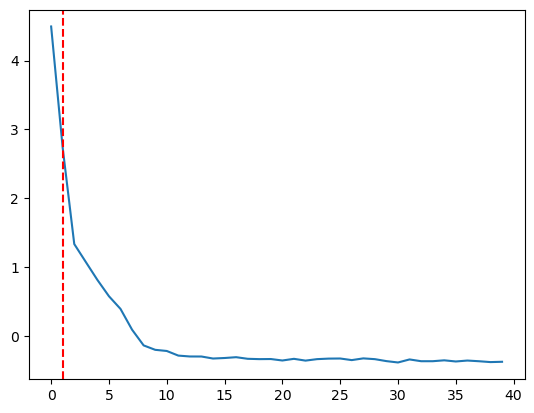

In [46]:
plt.plot(data["train_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
max_val_epoch, data["train_results_loss"].mean(axis=1)

### 训练过程中，模型在val 下降趋势

#### 验证集loss下降趋势

array([0.50897641, 0.46558087, 0.46397342, 0.4761803 , 0.47444764,
       0.47876026, 0.48137852, 0.49193625, 0.48420952, 0.50210404,
       0.48945424, 0.489747  , 0.49294636, 0.49246119, 0.47154459,
       0.46338223, 0.46948894, 0.47184187, 0.47530073, 0.46765275,
       0.47537899, 0.477819  , 0.47273646, 0.47270007, 0.47218064,
       0.47597517, 0.4778377 , 0.4740297 , 0.47693961, 0.47728454,
       0.47747265, 0.47492834, 0.48083425, 0.47538785, 0.48396949,
       0.47897227, 0.48196668, 0.47332364, 0.47815465, 0.47561639])

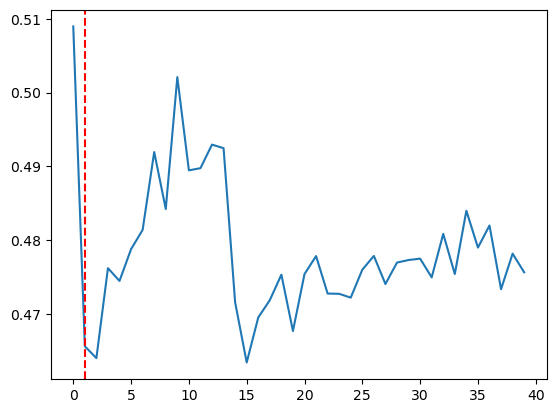

In [47]:
plt.plot(data["val_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

array([0.8469666 , 0.86059986, 0.86128153, 0.85616905, 0.84628494,
       0.84628494, 0.83674165, 0.82822086, 0.81117928, 0.81288344,
       0.80436264, 0.79754601, 0.80163599, 0.79822768, 0.81424676,
       0.81186094, 0.80913429, 0.8135651 , 0.8190184 , 0.80231766,
       0.80129516, 0.79993183, 0.79720518, 0.80163599, 0.79447853,
       0.8006135 , 0.79686435, 0.79686435, 0.78868439, 0.79481936,
       0.78868439, 0.79038855, 0.78970688, 0.7931152 , 0.79481936,
       0.78698023, 0.78698023, 0.79379686, 0.79209271, 0.79209271])

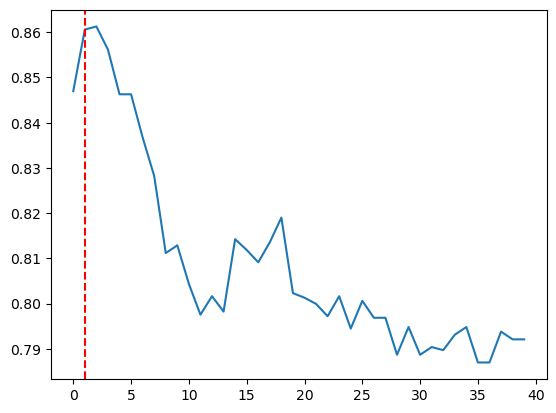

In [48]:
plt.plot(data[f"val_AUROC_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_AUROC_list"]

array([0.42200864, 0.46308553, 0.45573623, 0.40229572, 0.36854211,
       0.39124924, 0.34844472, 0.38253361, 0.38707055, 0.41356013,
       0.41089594, 0.41693536, 0.44690729, 0.41759322, 0.41749231,
       0.41291518, 0.39664345, 0.39699934, 0.40410491, 0.40116368,
       0.39049283, 0.38813365, 0.38842125, 0.37858359, 0.36946101,
       0.37381686, 0.37575654, 0.37691428, 0.36253328, 0.38450645,
       0.36452166, 0.38020316, 0.37939597, 0.37648244, 0.37573152,
       0.3791927 , 0.37189841, 0.37869327, 0.37774619, 0.37004846])

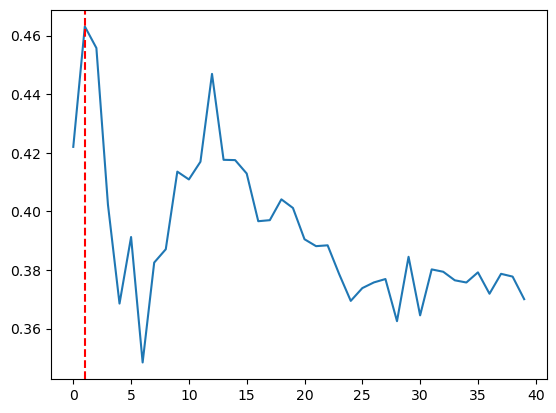

In [49]:
plt.plot(data[f"val_{metric}_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_{metric}_list"]

[2.47806112 2.36705163 2.17900369 1.97704737 1.7406429  1.50325296
 1.28699815 1.06352262 0.85219017 0.77163937 0.72367784 0.71173919
 0.70584749 0.6806542  0.68741321 0.69242292 0.69144385 0.67007519
 0.68372296 0.65818323 0.64396302 0.66847665 0.65796691 0.66608769
 0.67936473 0.66399695 0.66096247 0.66674441 0.64227535 0.64073008
 0.64432268 0.66097489 0.64951449 0.65220356 0.65658557 0.66483784
 0.6580387  0.63178113 0.654575   0.65451176]


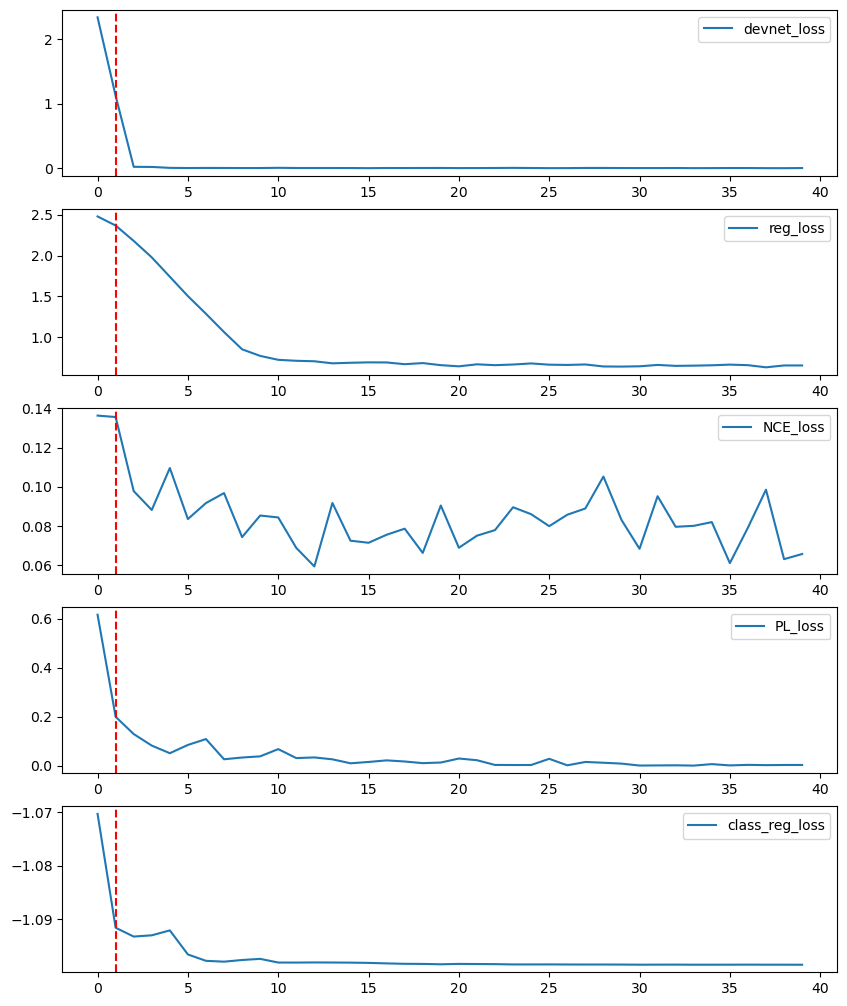

In [50]:
temp = data["sub_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(temp.shape[1],1,figsize=(10,2.5 * temp.shape[1]))
if dir_path.__contains__("method13"):
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
elif dir_path.__contains__("VAE_LPIPS_DEVNET"):
    loss_name_list = ["rec_loss", "kl_loss", "devnet_loss", "reg_loss", "PL_loss", "class_reg_loss"]
else:
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
for idx, label in enumerate(loss_name_list):
    ax[idx].plot(temp[0:,idx], label=label)
    ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
    ax[idx].legend()

# for i in range(5):
#     print(temp[0:,i])
print(temp[0:, 1])
plt.show()

In [51]:
import math
-(1/3)*math.log(1/3)*3
-(0.01)*math.log(0.01) * 2 + (-0.98*math.log(0.98))

0.1119020568909309

In [52]:
# data["sub_train_results_loss"].mean(axis=1)

In [53]:
if "pre_epochs" in para_name_list:
    temp = []
    for item in file_name.split(","):
        if re.match("epochs=|lr=|reg_lambda", item):
            pass
        else:
            temp.append(item)
    data = np.load(f'../experiment/{",".join(temp)}', allow_pickle=True)

In [54]:
plt.plot(data["pre_train_results_loss"].mean(axis=1))

KeyError: 'pre_train_results_loss is not a file in the archive'

In [ ]:
temp = data["sub_pre_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(2,1,figsize=(6, 6))
ax[0].plot(temp[0:,0], label="NCE_loss")
ax[1].plot(temp[0:,1], label="PL_loss") 
ax[0].legend()
ax[1].legend()
plt.show()

: 

In [ ]:
temp[0:,0]

: 

In [ ]:
temp[0:,1]

: 